# Practical coursework: COMP6481/8481 2022/23

**Anna Jordanous**

# Part A

This notebook contains the questions for Part A of the practical coursework. 

When you answer these questions, include in your submission for Part A your answers and the code that you used. 

The most straightforward way to do this is to complete Part A within this Jupyter notebook. *Please add your answers and code per question in the indicated cells.*

You can instead submit a separate python file for Part A if this is preferable for you, but remember to include:
* your code 
* comments that: 
 * clearly indicate which question each code snippet relates to, 
 * contain the answer to that question.

Part A is worth 20 marks in total. Each question is annotated with the number of marks that question is worth. In each question, half the marks are awarded for the code and half the marks are awarded for correct answers to the question.

***Cells are provided for you to complete your answers in this notebook. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***

## Important: do this first
Run the following cells before attempting the questions.
When each cell has completed running successfully, it will print an output message confirming that this cell has finished processing. 

If you have any issues, log into jupyter.kent.ac.uk and run this notebook on jupyter.kent.ac.uk.

To run this notebook initially, you will need to be working with connection to the internet, as it reads files from online sources. 

In [1]:
#import required/useful libraries
import nltk
import pandas as pd
import matplotlib
import numpy as np
import urllib.request

print('finished processing import statements')

# Note: these packages are all available if you run this notebook on jupyter.kent.ac.uk

ModuleNotFoundError: No module named 'nltk'

In [ ]:
#Read in data
prefix = "https://raw.githubusercontent.com/annajordanous/COMP6481-8481/main/"
suffix = ".pdf.txt"
samples = ["instb", "unitb", "instw", "unitw"]
b_env = ["TheUniversityofBirmingham", "TheUniversityofSheffield", "UniversityofNottingham,The", 
         "TheUniversityofLancaster", "UniversityofBristol", "UniversityofSouthampton", 
         "TheUniversityofManchester", "UniversityofDundee", "UniversityofYork"]
w_env = ["AstonUniversity", "BirkbeckCollege", "LiverpoolJohnMooresUniversity",
         "ManchesterMetropolitanUniversity", "NottinghamTrentUniversity", "TheUniversityofHuddersfield",
         "TheUniversityofWestLondon", "UniversityofEastLondon", "UniversityofStirling"]
k_env = ["TheUniversityofKent"]
instb = {}
instw = {}
instk = {}
unitb = {}
unitw = {}
unitk = {}

def readURL(filename):
    # open a connection to a URL using urllib
    webUrl  = urllib.request.urlopen(filename)
    # read the data from the URL and print it
    data = webUrl.read()
    return data
    
def readFiles(x, tag):
    itag = "inst"+tag
    filenameI = prefix+itag+"/"+itag+x+suffix
    utag = "unit"+tag
    filenameU = prefix+utag+"/"+utag+x+"-11"+suffix
    dataI = str(readURL(filenameI))
    dataU = str(readURL(filenameU))
    return(dataI, dataU)

print("finished setting up variables and functions for data readin")


finished setting up variables and functions for data readin


In [ ]:
# this cell may take some time to run

# read in textual data 
for x in b_env:
    (instb[x], unitb[x]) = readFiles(x, "b")
    
for x in w_env:
    (instw[x], unitw[x]) = readFiles(x, "w")

for x in k_env:
    (instk[x], unitk[x]) = readFiles(x, "k")
    
print("Finished reading in textual data")

Finished reading in textual data


In [ ]:
# this cell may take some time to run

# read in spreadsheet data 
docAwards = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-DoctoralDegreesAwarded.xlsx?raw=true')
researchIncome = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncome.xlsx?raw=true')
researchIncomeInKind = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-ResearchIncomeInKind.xlsx?raw=true')
resultsSummary = pd.read_excel('https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-resultsSummary.xlsx?raw=true')
# This file is just for information
# https://github.com/annajordanous/COMP6481-8481/blob/main/sampleData/REF2021Results-SelectedSamples-selectionCommentary.xlsx

print("Finished reading in spreadsheet data")


Finished reading in spreadsheet data


## Selected universities for comparison

Our `env_better_than_kent` sample of 'Computer Science and Informatics' universities with similar REF outputs performance to Kent but *better* performance in environment is:
* The University of Birmingham
* The University of Sheffield
* University of Nottingham, The
* The University of Lancaster
* University of Bristol
* University of Southampton
* The University of Manchester
* University of Dundee
* University of York

Our `env_worse_than_kent` sample of 'Computer Science and Informatics' universities with similar REF outputs performance to Kent but *worse* performance in environment is:
* Aston University
* Birkbeck College
* Liverpool John Moores University
* Manchester Metropolitan University
* Nottingham Trent University
* The University of Huddersfield
* The University of West London
* University of East London
* University of Stirling

## The data

### data frames

* `resultsSummary` gives a summary of all REF results data for the above selected universities and Kent overall, for outputs, for impact and for environment
* `docAwards` gives a summary of all REF data for the above selected universities and Kent for the number of doctoral degrees awarded per year at each university
* `researchIncome` gives a summary of all REF data for the above selected universities and Kent for the amount of research income (funding) awarded per year at each university
* `researchIncomeInKind`  gives a summary of all REF data for the above selected universities and Kent for the amount of research income in kind (non-financial donations that have monetary value) awarded per year at each university


### text dictionaries and variables 

* `instb` is a dictionary of institution statements for the 'env_better_than_kent' sample, with the keys as provided in the list `b_env`: 
 * ['TheUniversityofBirmingham', 'TheUniversityofSheffield', 'UniversityofNottingham,The', 'TheUniversityofLancaster', 'UniversityofBristol', 'UniversityofSouthampton', 'TheUniversityofManchester', 'UniversityofDundee', 'UniversityofYork']

* `unitb` is a dictionary of unit statements for the 'env_better_than_kent' sample, with the keys as provided in the list `b_env`: 
 * ['TheUniversityofBirmingham', 'TheUniversityofSheffield', 'UniversityofNottingham,The', 'TheUniversityofLancaster', 'UniversityofBristol', 'UniversityofSouthampton', 'TheUniversityofManchester', 'UniversityofDundee', 'UniversityofYork']

* `instw` is a dictionary of institution statements for the 'env_worse_than_kent' sample, with the keys as provided in the list `w_env`: 
 * ['AstonUniversity', 'BirkbeckCollege', 'LiverpoolJohnMooresUniversity', 'ManchesterMetropolitanUniversity', 'NottinghamTrentUniversity', 'TheUniversityofHuddersfield', 'TheUniversityofWestLondon', 'UniversityofEastLondon', 'UniversityofStirling']

* `unitw` is a dictionary of unit statements for the 'env_worse_than_kent' sample, with the keys as provided in the list `w_env`: 
 * ['AstonUniversity', 'BirkbeckCollege', 'LiverpoolJohnMooresUniversity', 'ManchesterMetropolitanUniversity', 'NottinghamTrentUniversity', 'TheUniversityofHuddersfield', 'TheUniversityofWestLondon', 'UniversityofEastLondon', 'UniversityofStirling']

* `instk` is a dictionary of the (single) institution statement for Kent, with the key as provided in the list `k_env`: 
 * ["TheUniversityofKent"]

* `unitk` is a dictionary of the (single) unit statement for Kent, with the key as provided in the list `k_env`: 
 * ["TheUniversityofKent"]

Please refer to the slides for the coursework and the lecture on the coursework from Wednesday 8th March if you would like further explanation of these data and text.

### Links

All data and text are sourced from https://www.ref.ac.uk/

Copies of each of these files are available at https://github.com/annajordanous/COMP6481-8481/

**For Part A, we will focus on the unit environment statements for each university in our sample, i.e. the texts in the dictionaries** 
* `unitb`
* `unitw`
* `unitk`

Some code to help you use the text dictionaries:

The following code goes through each of the universities in the `env_better_than_kent` sample, and prints:
* the key for that university in the above dictionaries
* the first 200 characters of the unit environment statement (i.e. the statement written about the research environment at that Computer Science and Informatics deparatment at that university)
* the first 200 characters of the institution environment statement (i.e. the statement written about the research environment across the whole of that university)



In [ ]:
for b in b_env:
    print(b)
    print(unitb[b][0:200])
    print(instb[b][0:200])
    print()

TheUniversityofBirmingham
b"Unit-level environment template (REF5b)\n Institution: University of Birmingham\n Unit of Assessment: UoA11, Computer Science and Informatics\n 1 Unit context and structure, research and impact stra
b'Institutional level environment template (REF5a)\n Institution: University of Birmingham\n 1. Context and mission\n Founded in 1900, The University of Birmingham (UoB) is a civic, research-intensive

TheUniversityofSheffield
b"Unit-level environment template (REF5b)\n Institution: University of Sheffield\n Unit of Assessment: B-11 Computer Science and Informatics\n 1. Unit context and structure, research and impact strate
b"Institutional level environment template (REF5a)\n  Institution: University of Sheffield\n  1. Context and mission\nResearch at the University of Sheffield is distinctive and innovative. We drive in

UniversityofNottingham,The
b"Unit-level environment template (REF5b)\n Institution: University of Nottingham\n Unit of Assessment: 11 \xe2\x80\

# Coursework questions for Part A:

For each question, please add your code to the empty code cell below the question, and please add any written answers/comments to the empty markdown cell below the question, as indicated. 

***You are allowed to add additional code markdown cells as needed below this point. Please do not edit any of the existing code and markdown already provided in this Jupyter notebook.***


## Q1. [4 marks] 

We have defined a measure of `lexical richness` as: the number of unique tokens in a text, divided by the total number of tokens in that text. 

We have also defined a second measure: how many times, on average, is each token used in the text? 

Clarification: Tokenise the data using either nltk's word tokenizer (preferred) or the split() function (if necessary).

*Without doing any additional processing on the texts*, calculate for each university in our data, including Kent,
i.e. for all texts in the dictionaries unitb, unitw and unitk:
* the lexical richness for the *unit* Environment statements (number of unique tokens in a statement text / the total number of tokens in that statement text)
* how many times, on average, is each token used in the statement text

Store the results in a new dictionary called `lr` , where the dictionary key is the university key (as in b_env, w_env and k_env), and the value is an ordered *list* of: 
* the calculated lexical richness for that university's statement text 
* how many times on average is a word used in that universities statement text?


For example, if we have calculated that the unit Environment statement for "TheUniversityofBirmingham" has a lexical richness of 12.3, and that on average, tokens in this statement are used 5.5 times, one possible way we could add this to the `lr` dictionary is: 

`lr["TheUniversityofBirmingham"] = [12.3, 5.5]`



In [ ]:
# please add your code for Q1 here (double click to edit)
lr = {}

#function that calculates the lexical richness
def lexical_richness(text):
    tokens = nltk.word_tokenize(text)
    uniqueTokens = len(set(tokens))
    totalTokens = len(tokens)
    return uniqueTokens / totalTokens, totalTokens / uniqueTokens

#calculete the lexical richness in each university in the b environemnt 
for university in b_env:
    unitText = unitb[university]
    lr[university] = lexical_richness(unitText)
    
#calculete the lexical richness in each university in the w environemnt    
for university in w_env:
    unitText = unitw[university]
    lr[university] = lexical_richness(unitText)
    
#calculete the lexical richness in each university in the k environemnt 
for university in k_env:
    unitText = unitk[university]
    lr[university] = lexical_richness(unitText)
    

In [ ]:
# please do not delete or edit this cell 
print(lr)


{'TheUniversityofBirmingham': (0.2641345546430828, 3.785949177877429), 'TheUniversityofSheffield': (0.2712015566726123, 3.6872944693572496), 'UniversityofNottingham,The': (0.2590920087089751, 3.859632741985683), 'TheUniversityofLancaster': (0.25948248151719705, 3.853824713533602), 'UniversityofBristol': (0.2853174909343415, 3.5048674959437536), 'UniversityofSouthampton': (0.2543605788032851, 3.9314268142681428), 'TheUniversityofManchester': (0.287238644556597, 3.481425702811245), 'UniversityofDundee': (0.3265822784810127, 3.062015503875969), 'UniversityofYork': (0.2408542424822831, 4.151888667992048), 'AstonUniversity': (0.267954565781236, 3.7319759679572764), 'BirkbeckCollege': (0.2719693339722089, 3.6768851303735026), 'LiverpoolJohnMooresUniversity': (0.2331708928718923, 4.288699964576692), 'ManchesterMetropolitanUniversity': (0.2627327356910649, 3.806149231346082), 'NottinghamTrentUniversity': (0.2806430729391454, 3.5632449058054596), 'TheUniversityofHuddersfield': (0.26749413604378

## Q2. [4 marks]

Create a Pandas data frame called `lr_df` from the dictionary `lr`. 

Then *transpose* lr_df, so that each row represents a university and the three columns represent the university key names, lexical richness and average token uses, respectively.


In [ ]:
# please add your code for Q2 here (double click to edit)
lr_df = pd.DataFrame(lr, index=['lexical_richness', 'avg_token_usage']).transpose()

# Reset the index so that the university key names become a separate column
lr_df.reset_index(inplace=True)
lr_df.columns = ['university', 'lexical_richness', 'avg_token_usage']

In [ ]:
# please do not delete or edit this cell 
lr_df

,university,lexical_richness,avg_token_usage
0,TheUniversityofBirmingham,0.264135,3.785949
1,TheUniversityofSheffield,0.271202,3.687294
2,"UniversityofNottingham,The",0.259092,3.859633
3,TheUniversityofLancaster,0.259482,3.853825
4,UniversityofBristol,0.285317,3.504867
5,UniversityofSouthampton,0.254361,3.931427
6,TheUniversityofManchester,0.287239,3.481426
7,UniversityofDundee,0.326582,3.062016
8,UniversityofYork,0.240854,4.151889
9,AstonUniversity,0.267955,3.731976


## Q3. [4 marks] 

Choose an appropriate visualisation to create a visualisation of the data in your `lr_df` data frame from Q2. 

You can consult the lectures on visualisation and also use the following docs to help guide you and give you inspiration:
* https://matplotlib.org/stable/plot_types/basic/index.html 
* https://realpython.com/pandas-plot-python/ 
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
* https://www.w3schools.com/python/matplotlib_intro.asp 

Give a brief comment in the markdown box below about why you have chosen the visualisation you did, with reference to the type of data you are visualising. 

Also add a comment answering the question: "Do you see any patterns in your visualisation of the data frame `lr_df`?"

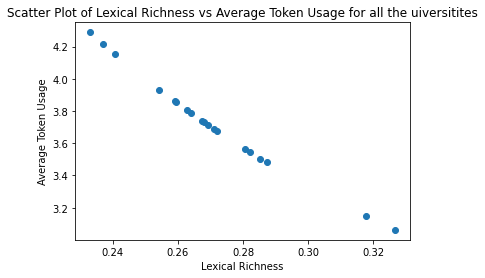

In [ ]:
# please add your code for Q3 here (double click to edit)
import matplotlib.pyplot as plt

#Make use of the pandas data frame from question 2 and display the data in a scatter plot
plt.scatter(lr_df['lexical_richness'], lr_df['avg_token_usage']) 
plt.xlabel('Lexical Richness') #x-Axis of the scatter plot
plt.ylabel('Average Token Usage') #y-Axis of the scatter plot
plt.title('Scatter Plot of Lexical Richness vs Average Token Usage for all the uiversitites') #headline
plt.show() #display the points


**Please add your written answers/comments for Q3 here (double-click to edit)**

"Why did you chose the visualisation you did, with reference to the type of data you are visualising?"

Your answer:In order to visualise the link between two continuous variables in this example, lexical richness and average token usage I used a scatter plot, which is both straightforward and efficient. Scatter plots assist us in better grasping the data by enabling us to see whether there is any correlation or pattern between these two variables.

"Do you see any patterns in your visualisation of the data frame `lr_df`?"

Your answer: There does not seem to be a strong pattern or correlation between lexical richness and average token usage for the universities. The data points are scattered across the plot without forming any distinct trends or clusters.I think that that these two variables are not strongly related to each other, and different universities have different levels of lexical richness and token usage in their unit environment statements. Hence there will be no trend sicne the data which is collected is not dependant in any form. 


## Q4. [6 marks]

For the *unit* environment statement for each university in our data, including Kent, (i.e. for all texts in the dictionaries unitb, unitw and unitk), perform the following pre-processing steps in this order:

* tokenise the text using nltk.word_tokenize()
* convert all text to lower case
* perform POS-tagging using nltk.pos_tag()

These steps will create a list of `POS-tagged tokens` for each university's unit environment statement. By `POS-tagged tokens`, this means tokens with tags indicating the relevant part of speech (POS). 

Using FreqDist, for each university's unit environment statement, calculate the frequency distribution for these POS-tagged tokens. (So you will calculate one frequency distribution per each university in our data.)

Create a new dictionary called `fd` where the dictionary key is the university key (as in b_env, w_env and k_env), and the value is a list of the 10 most common `POS-tagged tokens` for that university's pre-processed unit environment statement.

For example, if we have calculated a list of the 10 most common `POS-tagged tokens` from the pre-processed unit Environment statement for "TheUniversityofBirmingham", and stored that list in the list variable `mostCommon`, one possible way we could add this to the fd dictionary is:

fd["TheUniversityofBirmingham"] = mostCommon

In [ ]:
import nltk
from nltk import FreqDist

fd = {'b_env': [], 'k_env': [], 'w_env': []}

# Pre-processing function which preprocesses the text in order to
def preprocessText(text):
    # Tokenize
    tokens = nltk.word_tokenize(text)             #tokenise the text
    tokens = [token.lower() for token in tokens]  #convert the text to lower case
    posTaggedTokens = nltk.pos_tag(tokens)        #pos tag the text

    return posTaggedTokens

# crate a new dictionary and add alll the preprocessed texts for each university
preprocessedUniText= {}

for university in b_env + w_env + k_env:
    if university in b_env:
        text = unitb[university]
    elif university in w_env:
        text = unitw[university]
    else:
        text = unitk[university]
        
    preprocessedUniText[university] = preprocessText(text)

# Calculate frequency distributions and store the 10 most common POS-tagged tokens in a new dictionary
fd = {} 
for university in preprocessedUniText:
    posTaggedTokens = preprocessedUniText[university]
    freqDistribution = FreqDist(posTaggedTokens)
    mostCommon = freqDistribution.most_common(10) #store 10 most common tokens
    fd[university] = mostCommon


In [ ]:
# please do not delete or edit this cell 
for f in fd:
    print(f, fd[f])

TheUniversityofBirmingham [((',', ','), 891), (('and', 'CC'), 476), (('the', 'DT'), 378), (('(', '('), 330), ((')', ')'), 330), (('.', '.'), 286), (('of', 'IN'), 281), (('in', 'IN'), 219), (('to', 'TO'), 186), (('research', 'NN'), 154)]
TheUniversityofSheffield [((',', ','), 637), (('and', 'CC'), 456), (('.', '.'), 440), (('the', 'DT'), 363), (('(', '('), 302), ((')', ')'), 302), (('of', 'IN'), 288), (('in', 'IN'), 253), (('to', 'TO'), 244), (('a', 'DT'), 179)]
UniversityofNottingham,The [((',', ','), 671), (('and', 'CC'), 490), (('the', 'DT'), 465), (('of', 'IN'), 320), ((')', ')'), 280), (('(', '('), 278), (('.', '.'), 275), (('in', 'IN'), 228), (('to', 'TO'), 197), (('research', 'NN'), 187)]
TheUniversityofLancaster [((',', ','), 678), (('and', 'CC'), 465), (('the', 'DT'), 332), (('of', 'IN'), 287), ((')', ')'), 284), (('(', '('), 261), (('.', '.'), 256), (('to', 'TO'), 222), (('in', 'IN'), 188), (('research', 'NN'), 161)]
UniversityofBristol [((',', ','), 783), (('and', 'CC'), 488)

## Q5. [2 marks] 

Looking at the original texts in `unitb`, `unitw` and `unitk`, suggest one extra pre-processing step you could do to improve the quality of this data. Briefly explain what that step is and why it would be useful. 

* You do not have to write the code to perform this step. * 

**Please add your written answers/comments for Q5 here (double-click to edit)**

What additional pre-processing step would you suggest and why?

One additonal preprocessing step tat i would do is remove the special characters. Referring to the text which i have analysed there is confusion since puntuation is considered as a token and in this case it has come up as a common token and if we had removed it we would have gotten a meaningful word instead. Hence, punctuationc it causes noise in text analysis and i think it should be and we can foucs in the dimensionality of the data. 

# End of part A. 

*Please submit this Jupyter notebook (or your Python file, as described above, if you preferred to work in a python file) as part of your submitted zip file.*



# Please now see the coursework specification document on Moodle for Part B

You are welcome to continue adding code/markdown comments to this file *below* this point, in cells below here, as you experiment with code for Part B. 
